In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        pass

In [2]:
import os
import pandas as pd

# Dosya yolları
train_cats_path = '/kaggle/input/cats-and-dogs-image-classification/train/cats/'
train_dogs_path = '/kaggle/input/cats-and-dogs-image-classification/train/dogs/'
test_cats_path = '/kaggle/input/cats-and-dogs-image-classification/test/cats/'
test_dogs_path = '/kaggle/input/cats-and-dogs-image-classification/test/dogs/'

# Dosya yollarını listele
def list_files(path, label):
    return [(os.path.join(path, f), label) for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Tüm verileri listele ve birleştir
all_data = list_files(train_cats_path, 'cat') + list_files(train_dogs_path, 'dog') + \
           list_files(test_cats_path, 'cat') + list_files(test_dogs_path, 'dog')

# Tek bir veri çerçevesi oluştur
df = pd.DataFrame(all_data, columns=['file_path', 'label'])

df.head()

,file_path,label
0,/kaggle/input/cats-and-dogs-image-classificati...,cat
1,/kaggle/input/cats-and-dogs-image-classificati...,cat
2,/kaggle/input/cats-and-dogs-image-classificati...,cat
3,/kaggle/input/cats-and-dogs-image-classificati...,cat
4,/kaggle/input/cats-and-dogs-image-classificati...,cat


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df.head()

,file_path,label
0,/kaggle/input/cats-and-dogs-image-classificati...,cat
1,/kaggle/input/cats-and-dogs-image-classificati...,dog
2,/kaggle/input/cats-and-dogs-image-classificati...,cat
3,/kaggle/input/cats-and-dogs-image-classificati...,cat
4,/kaggle/input/cats-and-dogs-image-classificati...,cat


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Resimleri yüklemek ve ölçeklendirmek için ImageDataGenerator kullanımı
datagen = ImageDataGenerator(rescale=1.0/255.0, validation_split=0.2)

# Eğitim verisi
train_generator = datagen.flow_from_dataframe(
    df,
    x_col='file_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Doğrulama verisi
validation_generator = datagen.flow_from_dataframe(
    df,
    x_col='file_path',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 558 validated image filenames belonging to 2 classes.
Found 139 validated image filenames belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Modeli oluştur
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # İlk Dropout katmanı

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # İkinci Dropout katmanı

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),  # Üçüncü Dropout katmanı

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Final Dropout katmanı
    Dense(1, activation='sigmoid')
])

# Modeli derle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Modelin özetini görüntüle
model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,329 (49.36 MB)

 Trainable params: 12,939,329 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Modeli eğit
history = model.fit( train_generator,epochs=19, validation_data=validation_generator)

Epoch 1/19


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 22s 871ms/step - accuracy: 0.4651 - loss: 1.6544 - val_accuracy: 0.3957 - val_loss: 0.6943
Epoch 2/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 792ms/step - accuracy: 0.5283 - loss: 0.6920 - val_accuracy: 0.3957 - val_loss: 0.6952
Epoch 3/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 759ms/step - accuracy: 0.5743 - loss: 0.6863 - val_accuracy: 0.4676 - val_loss: 0.6937
Epoch 4/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 794ms/step - accuracy: 0.5651 - loss: 0.6886 - val_accuracy: 0.6043 - val_loss: 0.6802
Epoch 5/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 770ms/step - accuracy: 0.5410 - loss: 0.6954 - val_accuracy: 0.3957 - val_loss: 0.6956
Epoch 6/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 16s 769ms/step - accuracy: 0.5386 - loss: 0.6921 - val_accuracy: 0.3957 - val_loss: 0.6965
Epoch 7/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 21s 798ms/step - accuracy: 0.5119 - loss: 0.6925 - val_accuracy: 0.3957 - val_loss: 0.6969
Epoch 8/19
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 758ms/step - accuracy: 0.5186 - loss: 0.6930 - val_accuracy: 0.395

In [8]:
model.save('catdogmodel.h5')

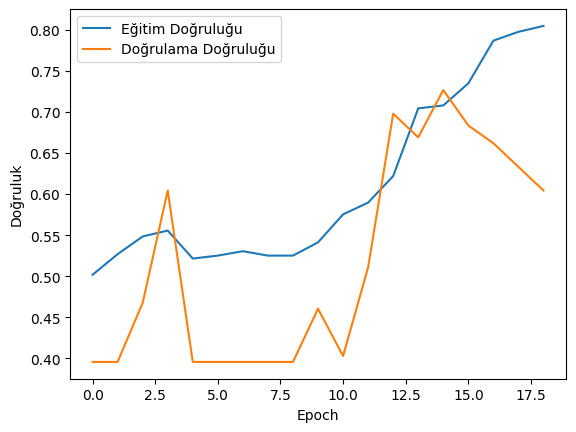

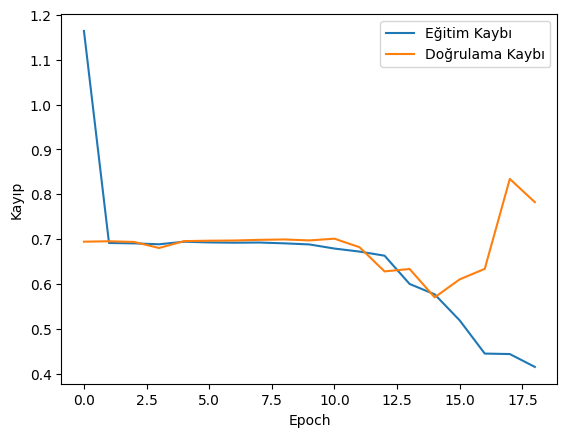

In [9]:
import matplotlib.pyplot as plt

# Eğitim ve doğrulama doğruluğunu çiz
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

# Eğitim ve doğrulama kaybını çiz
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()
plt.show()


In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/cats-and-dogs-image-classification/test/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Found 140 images belonging to 2 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 255ms/step - accuracy: 0.8589 - loss: 0.3906
Test Loss: 0.40786170959472656
Test Accuracy: 0.8500000238418579
